# Escuela Politécnica Nacional
## Facultad de Ingeniería en Sistemas
## Materia: Métodos Numéricos
## Nombre: Daniel Ismael Flores Espín

1) Dados los puntos (0,1),(1,5),(2,3), determine el spline cúbico.

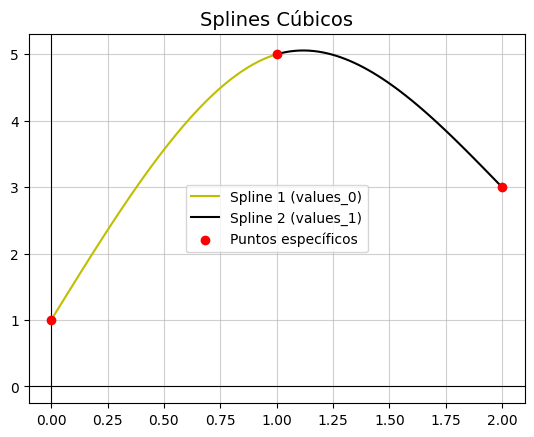

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#a b c d
values_0 = [1, 11/2, 0, -3/2]
values_1 = [5, 1, -9/2, 3/2]

points_x = [0, 1, 2]
points_y = [1, 5, 3]

def splincubico(a, b, c, d, x, x0:float):
    return a + b * (x - x0) + c * (x - x0)**2 + d * (x - x0)**3

x0 = np.linspace(points_x[0], points_x[1], 50)
x1 = np.linspace(points_x[1], points_x[-1], 50)

y_0 = splincubico(*values_0, x0, x0=points_x[0])
y_1 = splincubico(*values_1, x1, x0=points_x[1])

plt.plot(x0, y_0, label='Spline 1 (values_0)', color='y')
plt.plot(x1, y_1, label='Spline 2 (values_1)', color='k')

plt.scatter(points_x, points_y, color='red', label='Puntos específicos', zorder=5)

plt.title("Splines Cúbicos", fontsize=14)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.grid(alpha=0.6)
plt.legend()
plt.show()

2) Dados los puntos (−1,1),(1,3), determine el spline cúbico sabiendo que $f'(x_0)=1, f'(x_n)=2$.

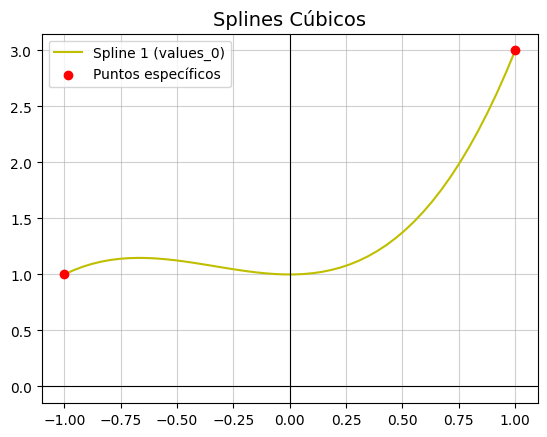

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#a b c d
values_0 = [1, 1, -2, 1]

points_x = [-1, 1]
points_y = [1, 3]

def splincubico(a, b, c, d, x, x0:float):
    return a + b * (x - x0) + c * (x - x0)**2 + d * (x - x0)**3

x0 = np.linspace(points_x[0], points_x[1], 50)
y_0 = splincubico(*values_0, x0, x0=points_x[0])

plt.plot(x0, y_0, label='Spline 1 (values_0)', color='y')

plt.scatter(points_x, points_y, color='red', label='Puntos específicos', zorder=5)

plt.title("Splines Cúbicos", fontsize=14)
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.grid(alpha=0.6)
plt.legend()
plt.show()

3) Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

In [ ]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # Compute alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    # Solve the tridiagonal system
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines


# Test with points
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

4) Usando la función anterior, encuentre el spline cúbico para: 
$x_s = [1, 2, 3],  y_s = [2, 3, 5]$

In [ ]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    # Compute alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    # Solve the tridiagonal system
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines


# Test with points
xs = [1, 2, 3]
ys = [3, 1, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

-3.5*x + 1.5*(x - 1)**3 + 6.5

1.0*x - 1.5*(x - 2)**3 + 4.5*(x - 2)**2 - 1.0

______


1.5*x**3 - 4.5*x**2 + 1.0*x + 5.0

-1.5*x**3 + 13.5*x**2 - 35.0*x + 29.0